In [1]:
import requests
import os
import sys
import time
import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [3]:
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
serviceKey = 'RGw97Q4JB16N2EY8WwF1SJQNiRBUjpgy2q7UamzURClzGBll62IpOHpsxhmzoBO50tlSgfZTKT00ShwfpHXUew%3D%3D'
## 서비스키 안될때
serviceKey = requests.utils.unquote(serviceKey)
params = {
    '_type':'json',
    'serviceKey':serviceKey,
    'YM':'202001',
    'NAT_CD':'130',
    'ED_CD':'E'
}

response = requests.get(url,params=params)
response.text

'{"response":{"header":{"resultCode":"0000","resultMsg":"OK"},"body":{"items":{"item":{"ed":"방한외래관광객","edCd":"E","natCd":130,"natKorNm":"일  본","num":203969,"rnum":1,"ym":202001}},"numOfRows":10,"pageNo":1,"totalCount":1}}}'

In [4]:
def get_request_url(ym, nat_cd, ed_cd='E'):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
        serviceKey = 'RGw97Q4JB16N2EY8WwF1SJQNiRBUjpgy2q7UamzURClzGBll62IpOHpsxhmzoBO50tlSgfZTKT00ShwfpHXUew%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey)
        params = {
            '_type':'json',
            'serviceKey':serviceKey,
            'YM':ym,
            'NAT_CD':nat_cd,
            'ED_CD':ed_cd
        }
        response = requests.get(url,params=params)
        if response.status_code ==200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code: '+ response.status_code)
            return None
        
    except Exception as e:
        print(e)
        return None

In [5]:
ym='200601'
nat_cd='275'
response = get_request_url(ym, nat_cd, ed_cd='E')
response
#response['response']['body']['items']['item']['num']

2020-06-11 15:07:52.017795 Url Request Success


{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': {'ed': '방한외래관광객',
     'edCd': 'E',
     'natCd': 275,
     'natKorNm': '미  국',
     'num': 34473,
     'rnum': 1,
     'ym': 200601}},
   'numOfRows': 10,
   'pageNo': 1,
   'totalCount': 1}}}

In [ ]:
jsonResult = []
nStartYear = 2005
nEndYear = 2020
nat_cd='275'
for year in range(nStartYear,nEndYear):
    for month in range(1,13):
        ym = '{0}{1:0>2}'.format(str(year),str(month))
        # print(ym)
        response = get_request_url(ym, nat_cd, ed_cd='E')
        check = response['response']['header']['resultMsg']
        if check=='OK':
            natKorNm = response['response']['body']['items']['item']['natKorNm']
            num = response['response']['body']['items']['item']['num']
            item = {'nat_name':natKorNm, 'nat_cd':nat_cd, 'yyyymm':ym,'visit_cnt':num}
            jsonResult.append(item)

In [12]:
import json

In [13]:
file_name = '해외방문객정보.json'
with open(file_name,'w',encoding='utf-8') as outfile:
    retJson = json.dumps(jsonResult, indent=4,sort_keys=True,ensure_ascii=False)
    outfile.write(retJson)

In [17]:
with open(file_name,'r',encoding='utf-8') as f:
    a = f.readlines()
    for i in a:
        print(i)

[

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 34769,

        "yyyymm": "200501"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 31561,

        "yyyymm": "200502"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 42056,

        "yyyymm": "200503"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 49877,

        "yyyymm": "200504"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 48940,

        "yyyymm": "200505"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 54938,

        "yyyymm": "200506"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 50295,

        "yyyymm": "200507"

    },

    {

        "nat_cd": "275",

        "nat_name": "미  국",

        "visit_cnt": 44981,

        "yyyymm":

In [20]:
cnVisit = []
VisitYM = []
index = []
i = 0
for item in jsonResult:
    index.append(i)
    cnVisit.append(item['visit_cnt'])
    VisitYM.append(item['yyyymm'])
    i+=1

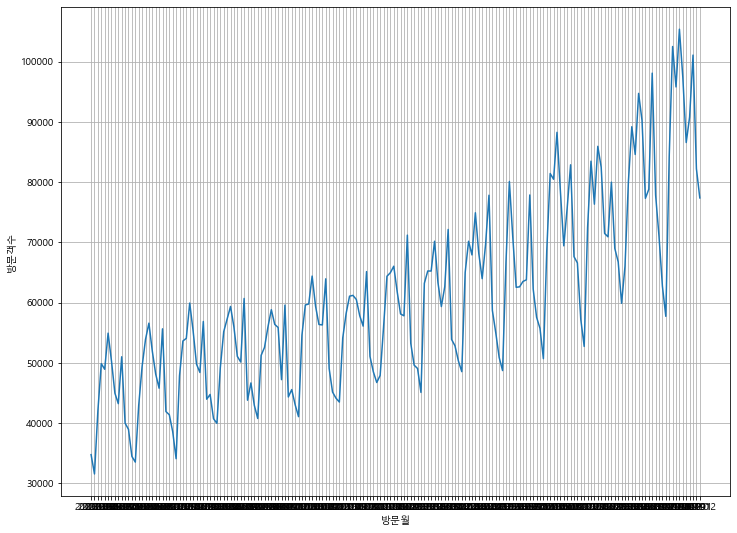

In [32]:
## 안하면 한글깨짐. 시스템에 있는 폰트지정.
font_location = 'c:/Windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(num=1,figsize=(12,9))
plt.xticks(index,VisitYM)
plt.plot(index,cnVisit)
plt.xlabel('방문월')
plt.ylabel('방문객수')
plt.grid(True)

plt.show()

In [15]:
ym='201801'
sido='서울특별시'
gungu=''
res_nm=''
page_no=1
num_rows=3

url = 'http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList'
serviceKey = 'RGw97Q4JB16N2EY8WwF1SJQNiRBUjpgy2q7UamzURClzGBll62IpOHpsxhmzoBO50tlSgfZTKT00ShwfpHXUew%3D%3D'
serviceKey = requests.utils.unquote(serviceKey)
params = {
    '_type':'json',
    'serviceKey':serviceKey,
    'YM':ym,
    'SIDO':sido,
    'GUNGU':gungu,
    'RES_NM':res_nm,
    'pageNo':page_no,
    'numOfRows': num_rows
}
response = requests.get(url,params=params)
response.json()
    

{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': [{'addrCd': 1111,
      'csForCnt': 19787,
      'csNatCnt': 40648,
      'gungu': '종로구',
      'resNm': '창덕궁',
      'rnum': 1,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1111,
      'csForCnt': 40684,
      'csNatCnt': 124211,
      'gungu': '종로구',
      'resNm': '경복궁',
      'rnum': 2,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1111,
      'csForCnt': 2108,
      'csNatCnt': 18188,
      'gungu': '종로구',
      'resNm': '창경궁',
      'rnum': 3,
      'sido': '서울특별시',
      'ym': 201801}]},
   'numOfRows': 3,
   'pageNo': 1,
   'totalCount': 15}}}

In [16]:
def get_request_url2(ym, sido, gungu,res_nm, page_no, num_rows):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList'
        serviceKey = 'RGw97Q4JB16N2EY8WwF1SJQNiRBUjpgy2q7UamzURClzGBll62IpOHpsxhmzoBO50tlSgfZTKT00ShwfpHXUew%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey)
        params = {
            '_type':'json',
            'serviceKey':serviceKey,
            'YM':ym,
            'SIDO':sido,
            'GUNGU':gungu,
            'RES_NM':res_nm,
            'pageNo':page_no,
            'numOfRows': num_rows
        }
        response = requests.get(url,params=params)
        if response.status_code ==200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code: '+ response.status_code)
            return None
        
    except Exception as e:
        print(e)
        return None

In [17]:
ym='201801'
sido='서울특별시'
gungu=''
res_nm=''
page_no=1
num_rows=100
response = get_request_url2(ym, sido, gungu,res_nm, page_no, num_rows)
response

2020-06-11 17:13:47.634965 Url Request Success


{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': [{'addrCd': 1111,
      'csForCnt': 19787,
      'csNatCnt': 40648,
      'gungu': '종로구',
      'resNm': '창덕궁',
      'rnum': 1,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1111,
      'csForCnt': 40684,
      'csNatCnt': 124211,
      'gungu': '종로구',
      'resNm': '경복궁',
      'rnum': 2,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1111,
      'csForCnt': 2108,
      'csNatCnt': 18188,
      'gungu': '종로구',
      'resNm': '창경궁',
      'rnum': 3,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1111,
      'csForCnt': 2450,
      'csNatCnt': 12633,
      'gungu': '종로구',
      'resNm': '종묘',
      'rnum': 4,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1117,
      'csForCnt': 6146,
      'csNatCnt': 279500,
      'gungu': '용산구',
      'resNm': '국립중앙박물관',
      'rnum': 5,
      'sido': '서울특별시',
      'ym': 201801},
     {'addrCd': 1114,

In [ ]:
def getTourPointData(item, ym, jsonResult2):
    addrCd= 0 if 'addrCd' not in item.keys() else item['addrCd']
    gungu='' if 'gungu' not in item.keys() else item['gungu']
    sido='' if 'sido' not in item.keys() else item['sido']
    resNm='' if 'resNm' not in item.keys() else item['resNm']
    rnum=0 if 'rnum' not in item.keys() else item['rnum']
    csForCnt=0 if 'csForCnt' not in item.keys() else item['csForCnt']
    csNatCnt=0 if 'csNatCnt' not in item.keys() else item['csNatCnt']
    
    data = {
        'ym':ym,
        'addrCd':addrCd,
        'gungu':gungu,
        'sido':sido,
        'resNm':resNm,
        'rnum':rnum,
        'csForCnt':csForCnt,
        'csNatCnt':csNatCnt
        }
    jsonResult2.append(data)
    return jsonResult2

In [21]:
jsonResult2 = []
nStartYear = 2011
nEndYear = 2017
sido='서울특별시';gungu='';res_nm='';page_no=1;num_rows=100

for year in range(nStartYear,nEndYear):
    for month in range(1,13):
        ym = '{0}{1:0>2}'.format(str(year),str(month))
        response = get_request_url2(ym, sido, gungu,res_nm, page_no, num_rows)
        if response['response']['header']['resultMsg']=='OK':
            nTotal = response['response']['body']['totalCount']
            if nTotal == 0:
                break
            items = response['response']['body']['items']['item']   ##items : 리스트
            
            for item in items:
                if len(item) ==0:
                    continue
                else:
                    getTourPointData(item, ym, jsonResult2)
                    jsonResult2.append(data)

                
                

2020-06-11 17:24:00.292469 Url Request Success
2020-06-11 17:24:00.451730 Url Request Success


AttributeError: 'str' object has no attribute 'keys'